In [3]:
import numpy as np
import scipy.io as sio 
dat = sio.loadmat('sub1_comp.mat',struct_as_record = True)

In [5]:
train_data = dat['train_data']
train_dg = dat['train_dg']
samples,channels = train_data.shape
#print(channels)

62


In [81]:
from matplotlib import pyplot as plt
%matplotlib inline 

tt = 400 #Sampling time
sf = 1000 #Sampling frequency 
time_space = np.linspace(0,tt,tt*sf)
channel_data = np.transpose(train_data,(1,0))
channel_space = [ x + 1 for x in range(channels) ]
finger_data = np.transpose(train_dg,(1,0))

In [87]:
# Channel-wise data :

# channel_no = int(input())
# plt.rcParams['figure.figsize'] = (20,5)
# plt.title(f"ECoG data for channel {channel_no}")
# plt.xlabel("Time")
# plt.plot(time_space,channel_data[channel_no-1])

In [89]:
# Finger data plot :

# plt.rcParams['figure.figsize'] = (20,10)
# fig,ax = plt.subplots(5,1)
# plt.subplots_adjust(hspace=0.5)
# for i in range(5):
#     ax[i].plot(time_space,finger_data[i])
#     ax[i].set_title(f'Finger {i+1}')

In [88]:
# Check for bad channels : 

std_dev = np.std(channel_data,axis=1)
allowed_error = 10000
bad_channels = [ i + 1 for i in range(channels) if std_dev[i] > allowed_error ]

# plt.rcParams['figure.figsize'] = (20,6)
# plt.xticks(np.arange(min(channel_space),max(channel_space) + 1,1))
# plt.plot(channel_space,std_dev)
# print(bad_channels)

In [10]:
import mne

In [90]:
sampling_freq = 1000
channel_names = [ f'ECOG{n:02}' for n in range(1,channels+1) ]
info = mne.create_info(ch_names=channel_names,ch_types=['ecog']*channels,sfreq=sampling_freq) 
info['bads'] = [ f'ECOG{n:02}' for n in bad_channels ]
raw = mne.io.RawArray(channel_data, info)
good = mne.pick_types(raw.info,ecog=True) #Exclude bad channels


Creating RawArray with float64 data, n_channels=62, n_times=400000
    Range : 0 ... 399999 =      0.000 ...   399.999 secs
Ready.


In [95]:
# raw.plot_psd(picks=good, tmin=0, tmax=400, fmin=0, fmax=200, average=True, spatial_colors=False)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Effective window size : 2.048 (s)


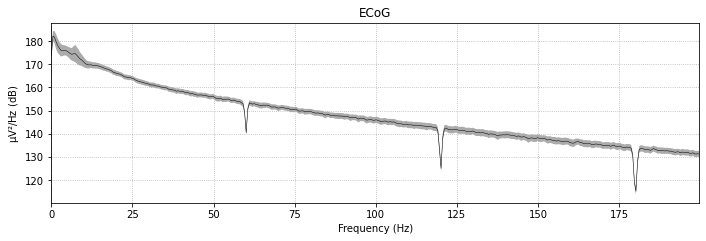

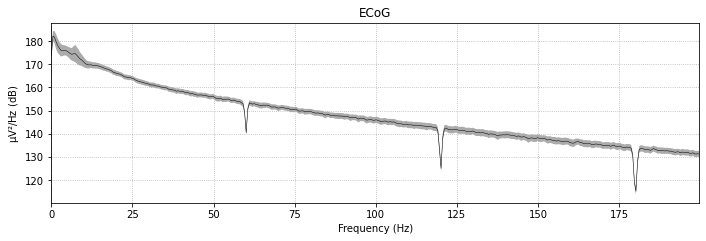

In [107]:
# Filter out frequencies with noise : 

base_freq = 60
freq_lim = 200
bad_freq = [ x for x in range(base_freq,freq_lim+1,base_freq) ]
raw_notch = raw.copy().notch_filter(freqs=bad_freq,picks=good)
raw_notch.plot_psd(picks=good, tmin=0, tmax=400, fmin=0, fmax=200, average=True, spatial_colors=False)


Opening raw-browser...


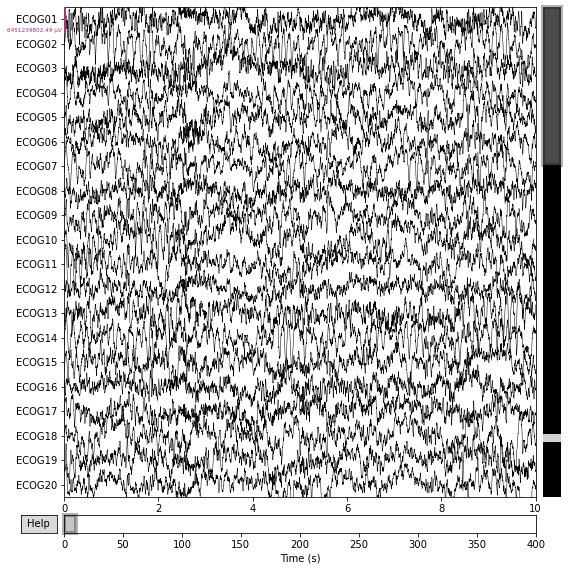

Opening raw-browser...


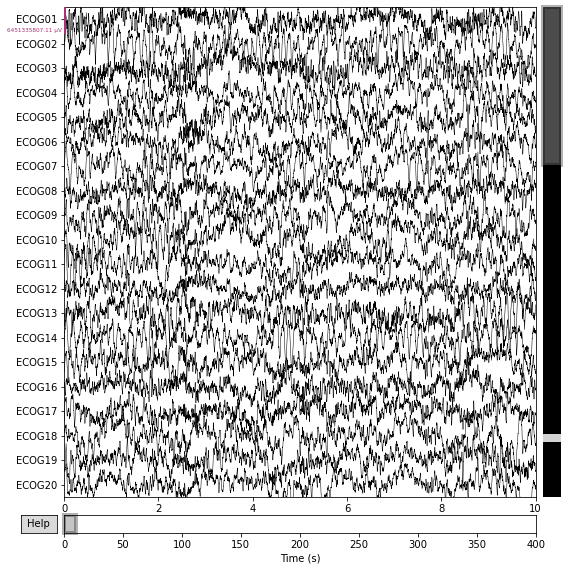

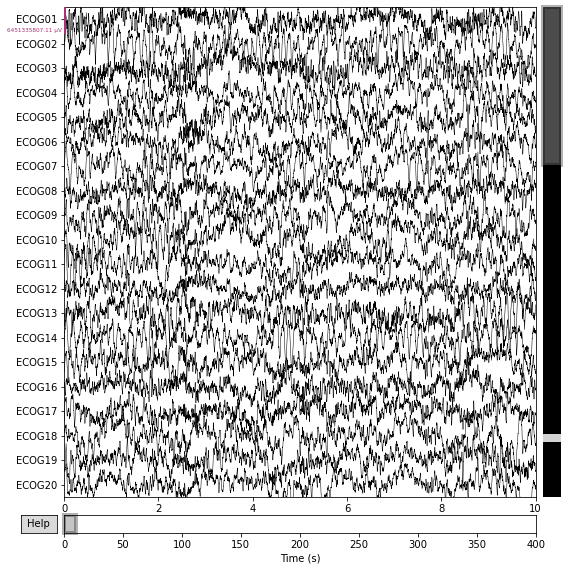

In [113]:
raw.plot(block=True,scalings='auto')
raw_notch.plot(block=True,scalings='auto')